## 0-İmport Library

In [1]:
#!conda install -c conda-forge lightgbm


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_columns", None)


## 1-Load Data

In [3]:
df = pd.read_csv("Heart_Disease.csv")

## 2-EDA

In [4]:
df.shape

(319795, 18)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
df["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

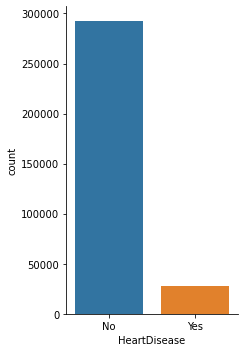

In [82]:
g = sns.catplot(x="HeartDisease",
                data=df, kind="count",
                height=5, aspect=0.7);

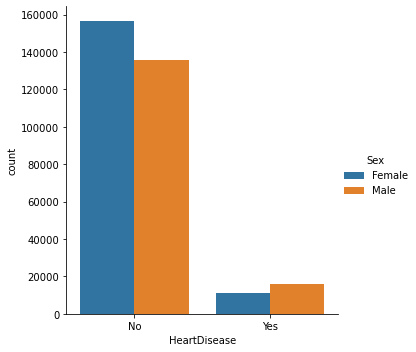

In [80]:
g = sns.catplot(x="HeartDisease", hue="Sex",
                data=df, kind="count",
                height=5, aspect=1);

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

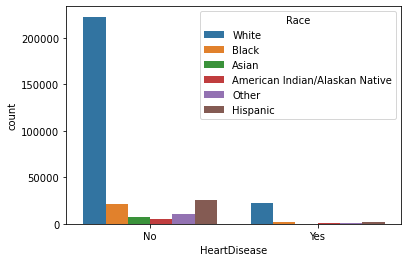

In [34]:
sns.countplot(x="HeartDisease", hue='Race', data=df)

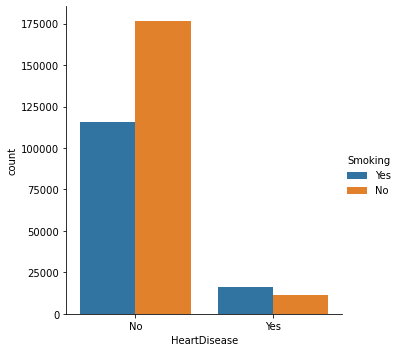

In [77]:
g = sns.catplot(x="HeartDisease", hue="Smoking",
                data=df, kind="count",
                height=5, aspect=1);

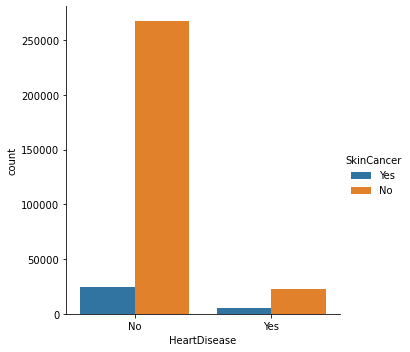

In [76]:
g = sns.catplot(x="HeartDisease", hue="SkinCancer",
                data=df, kind="count",
                height=5, aspect=1.0);

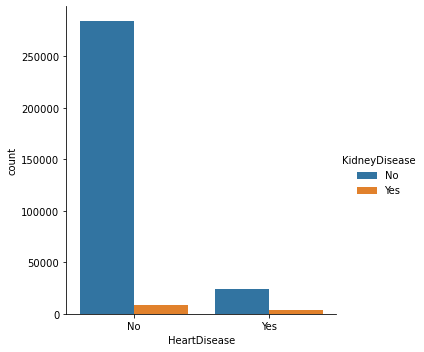

In [74]:
g = sns.catplot(x="HeartDisease", hue="KidneyDisease",
                data=df, kind="count",
                height=5, aspect=1.0);

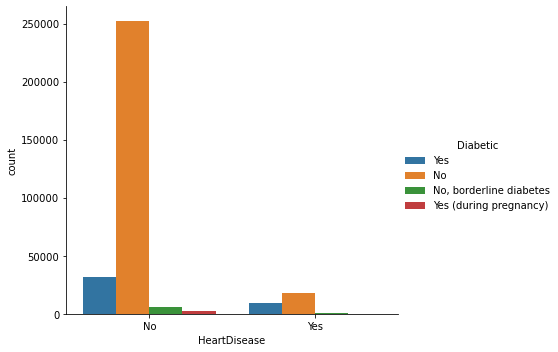

In [72]:
g = sns.catplot(x="HeartDisease", hue="Diabetic",
            data=df, kind="count",
            height=5, aspect=1.2);

<AxesSubplot:>

<AxesSubplot:>

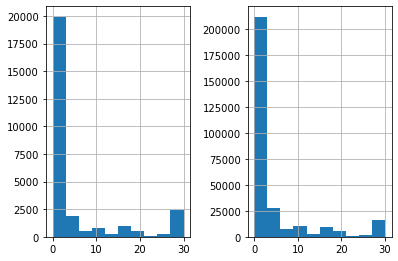

In [99]:
fig, ax =plt.subplots(1,2)
df[df["HeartDisease"] == "Yes"]["MentalHealth"].hist(ax=ax[0])
df[df["HeartDisease"] == "No"]["MentalHealth"].hist(ax=ax[1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

<AxesSubplot:>

<AxesSubplot:>

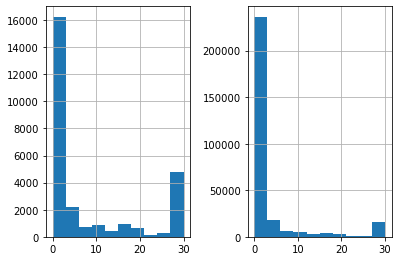

In [98]:
fig, ax =plt.subplots(1,2)
df[df["HeartDisease"] == "Yes"]["PhysicalHealth"].hist(ax=ax[0])
df[df["HeartDisease"] == "No"]["PhysicalHealth"].hist(ax=ax[1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

<AxesSubplot:>

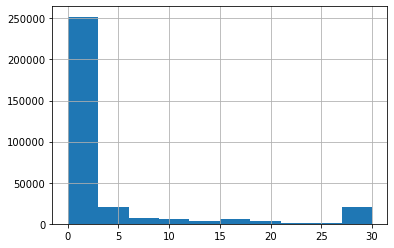

In [90]:
fig, axs = plt.subplots(2)
df[df["HeartDisease"] == "Yes"]["PhysicalHealth"].hist()

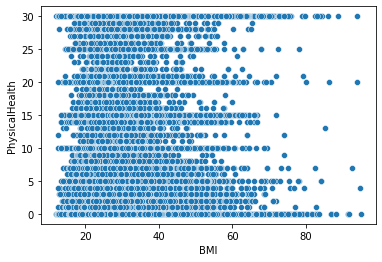

In [100]:
sns.scatterplot(x = "BMI", y = "PhysicalHealth", data = df);

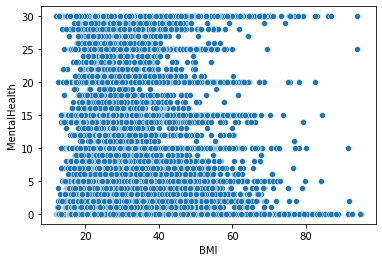

In [101]:
sns.scatterplot(x = "BMI", y = "MentalHealth", data = df);

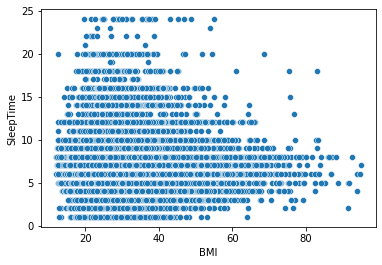

In [102]:
sns.scatterplot(x = "BMI", y = "SleepTime", data = df);

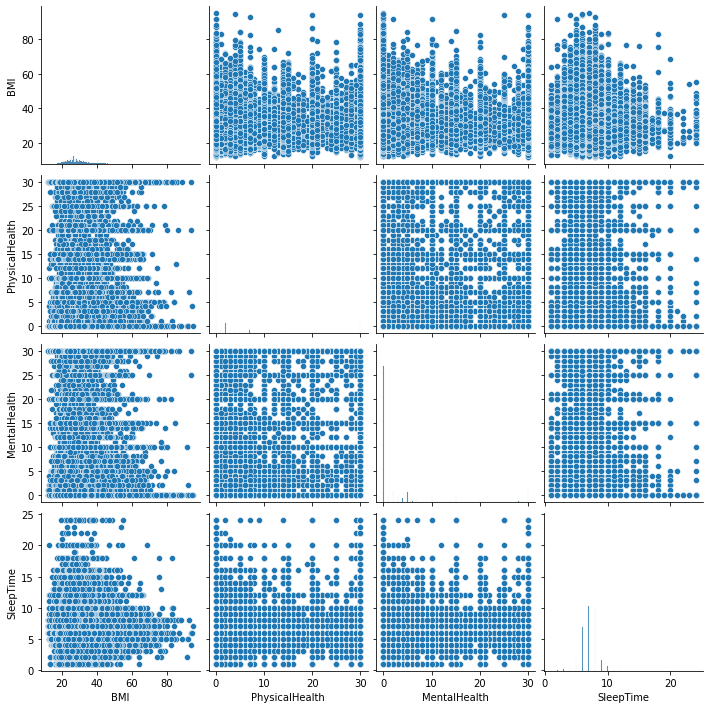

In [103]:
sns.pairplot(df);

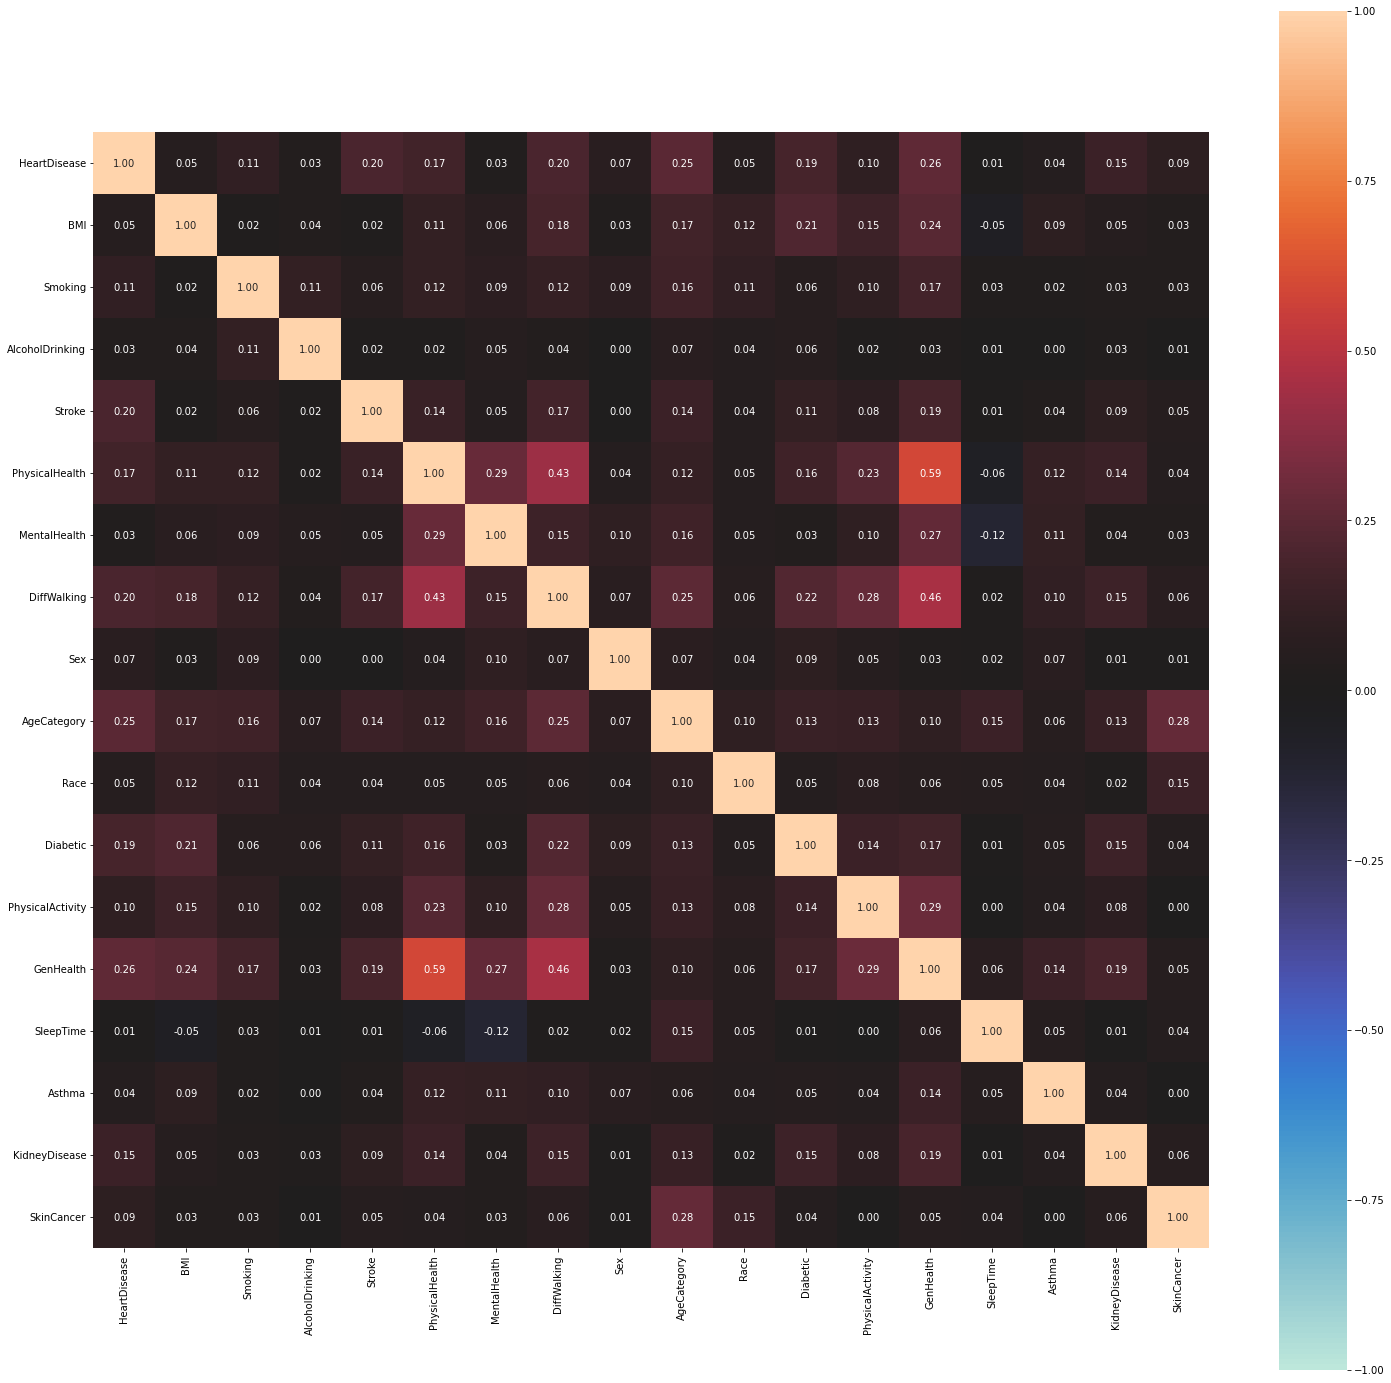

In [104]:
from dython.nominal import associations
corr = associations(df, figsize=(25,25))

## 3-Preprocessing

In [4]:
train, test = train_test_split(df, test_size=0.2,  random_state=42)

In [5]:
#train, validation = train_test_split(df, test_size=0.2,  random_state=42)

In [6]:
numeric_columns = train.select_dtypes(include = 'float64').columns.to_list()
numeric_columns
train.shape
for column in numeric_columns:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3-Q1
    lower_band = Q1 - 1.5*IQR
    upper_band = Q3 + 1.5*IQR
    filter_ = (train[column] < lower_band) | (train[column] > upper_band)
    train = train.loc[~filter_]
train.shape


['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

(255836, 18)

(180487, 18)

In [7]:
binary_columns = [column for column in df.columns if df[column].nunique() == 2]
le = preprocessing.LabelEncoder()
train.loc[:,binary_columns] = train.loc[:,binary_columns].apply(le.fit_transform)
test.loc[:,binary_columns] = test.loc[:,binary_columns].apply(le.fit_transform)


train.head()
test.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
95877,0,23.33,1,0,0,0.0,0.0,0,1,75-79,White,No,1,Very good,7.0,0,0,0
260256,0,32.69,0,0,0,2.0,2.0,0,1,50-54,Hispanic,No,0,Very good,8.0,0,0,0
84785,0,31.32,0,0,0,0.0,0.0,0,0,25-29,White,No,1,Excellent,8.0,0,0,0
218594,0,26.39,0,0,0,0.0,1.0,0,1,30-34,White,No,1,Very good,6.0,1,0,0
56162,0,24.86,0,0,0,0.0,0.0,1,0,70-74,White,No,0,Good,8.0,1,0,0


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
271884,0,27.63,1,0,0,0.0,25.0,0,0,25-29,Hispanic,No,1,Very good,7.0,0,0,0
270361,0,21.95,0,0,0,0.0,20.0,0,0,30-34,White,No,1,Excellent,6.0,0,0,1
219060,0,31.32,1,0,0,0.0,0.0,0,0,40-44,White,No,1,Very good,6.0,1,0,0
24010,0,40.35,0,0,0,30.0,0.0,0,0,65-69,White,No,0,Good,8.0,0,0,0
181930,0,35.61,1,0,0,30.0,30.0,1,0,60-64,White,No,0,Fair,4.0,1,0,1


In [8]:
numeric_columns = df.select_dtypes(include ='float64').columns.to_list()
std_scaler = preprocessing.StandardScaler().fit(train.loc[:,numeric_columns])
train.loc[:,numeric_columns] = std_scaler.transform(train.loc[:,numeric_columns])
test.loc[:,numeric_columns]  = std_scaler.transform(test.loc[:,numeric_columns])

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [32]:
train.head()
test.head()
train.shape()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
95877,0,-0.831540,1,0,0,-0.360873,-0.447044,0,1,11.0,1,3.0,-0.144807,0,0,0,0,0,0,0,0,1,1,0,0,0
260256,0,1.022480,0,0,0,1.545967,1.031148,0,1,6.0,0,3.0,0.747354,0,0,0,0,0,0,1,0,0,1,0,0,0
84785,0,0.751111,0,0,0,-0.360873,-0.447044,0,0,1.0,1,4.0,0.747354,0,0,0,0,0,0,0,0,1,1,0,0,0
218594,0,-0.225418,0,0,0,-0.360873,0.292052,0,1,2.0,1,3.0,-1.036969,1,0,0,0,0,0,0,0,1,1,0,0,0
56162,0,-0.528479,0,0,0,-0.360873,-0.447044,1,0,10.0,0,2.0,0.747354,1,0,0,0,0,0,0,0,1,1,0,0,0


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
271884,0,0.020200,1,0,0,-0.360873,18.030348,0,0,1.0,1,3.0,-0.144807,0,0,0,0,0,0,1,0,0,1,0,0,0
270361,0,-1.104889,0,0,0,-0.360873,14.334870,0,0,2.0,1,4.0,-1.036969,0,0,1,0,0,0,0,0,1,1,0,0,0
219060,0,0.751111,1,0,0,-0.360873,-0.447044,0,0,4.0,1,3.0,-1.036969,1,0,0,0,0,0,0,0,1,1,0,0,0
24010,0,2.539765,0,0,0,28.241721,-0.447044,0,0,9.0,0,2.0,0.747354,0,0,0,0,0,0,0,0,1,1,0,0,0
181930,0,1.600870,1,0,0,28.241721,21.725827,1,0,8.0,0,1.0,-2.821292,1,0,1,0,0,0,0,0,1,1,0,0,0


TypeError: 'tuple' object is not callable

In [10]:
for column in df.select_dtypes(include ='object').columns.to_list(): 
    if df[column].nunique() > 2:
        print(column +' : '+str(df[column].nunique()))
        

AgeCategory : 13
Race : 6
Diabetic : 4
GenHealth : 5


In [11]:
train = pd.get_dummies(train, columns = ["Race"], prefix = ["Race"])
train = pd.get_dummies(train, columns = ["Diabetic"], prefix = ["Diabetic"])
test = pd.get_dummies(test, columns = ["Race"], prefix = ["Race"])
test = pd.get_dummies(test, columns = ["Diabetic"], prefix = ["Diabetic"])
train.head()
test.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
95877,0,-0.831540,1,0,0,-0.360873,-0.447044,0,1,75-79,1,Very good,-0.144807,0,0,0,0,0,0,0,0,1,1,0,0,0
260256,0,1.022480,0,0,0,1.545967,1.031148,0,1,50-54,0,Very good,0.747354,0,0,0,0,0,0,1,0,0,1,0,0,0
84785,0,0.751111,0,0,0,-0.360873,-0.447044,0,0,25-29,1,Excellent,0.747354,0,0,0,0,0,0,0,0,1,1,0,0,0
218594,0,-0.225418,0,0,0,-0.360873,0.292052,0,1,30-34,1,Very good,-1.036969,1,0,0,0,0,0,0,0,1,1,0,0,0
56162,0,-0.528479,0,0,0,-0.360873,-0.447044,1,0,70-74,0,Good,0.747354,1,0,0,0,0,0,0,0,1,1,0,0,0


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
271884,0,0.020200,1,0,0,-0.360873,18.030348,0,0,25-29,1,Very good,-0.144807,0,0,0,0,0,0,1,0,0,1,0,0,0
270361,0,-1.104889,0,0,0,-0.360873,14.334870,0,0,30-34,1,Excellent,-1.036969,0,0,1,0,0,0,0,0,1,1,0,0,0
219060,0,0.751111,1,0,0,-0.360873,-0.447044,0,0,40-44,1,Very good,-1.036969,1,0,0,0,0,0,0,0,1,1,0,0,0
24010,0,2.539765,0,0,0,28.241721,-0.447044,0,0,65-69,0,Good,0.747354,0,0,0,0,0,0,0,0,1,1,0,0,0
181930,0,1.600870,1,0,0,28.241721,21.725827,1,0,60-64,0,Fair,-2.821292,1,0,1,0,0,0,0,0,1,1,0,0,0


In [12]:
df.GenHealth .unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [13]:
enc_1 = preprocessing.OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good','Excellent']])
train.loc[:,["GenHealth"]] = enc_1.fit_transform(train.loc[:,["GenHealth"]])
test.loc[:,["GenHealth"]] = enc_1.fit_transform(test.loc[:,["GenHealth"]])

In [14]:
enc_1.categories_

[array(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], dtype=object)]

In [15]:
df.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [16]:
enc_2 = preprocessing.OrdinalEncoder(categories=[['18-24', '25-29','30-34', '35-39', '40-44',
                                                '45-49', '50-54', '55-59', '60-64', '65-69',
                                                '70-74', '75-79', '80 or older'
                                               ]])
train.loc[:,["AgeCategory"]] = enc_2.fit_transform(train.loc[:,["AgeCategory"]])
test.loc[:,["AgeCategory"]] = enc_2.fit_transform(test.loc[:,["AgeCategory"]])

In [17]:
train.head()
test.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
95877,0,-0.831540,1,0,0,-0.360873,-0.447044,0,1,11.0,1,3.0,-0.144807,0,0,0,0,0,0,0,0,1,1,0,0,0
260256,0,1.022480,0,0,0,1.545967,1.031148,0,1,6.0,0,3.0,0.747354,0,0,0,0,0,0,1,0,0,1,0,0,0
84785,0,0.751111,0,0,0,-0.360873,-0.447044,0,0,1.0,1,4.0,0.747354,0,0,0,0,0,0,0,0,1,1,0,0,0
218594,0,-0.225418,0,0,0,-0.360873,0.292052,0,1,2.0,1,3.0,-1.036969,1,0,0,0,0,0,0,0,1,1,0,0,0
56162,0,-0.528479,0,0,0,-0.360873,-0.447044,1,0,10.0,0,2.0,0.747354,1,0,0,0,0,0,0,0,1,1,0,0,0


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
271884,0,0.020200,1,0,0,-0.360873,18.030348,0,0,1.0,1,3.0,-0.144807,0,0,0,0,0,0,1,0,0,1,0,0,0
270361,0,-1.104889,0,0,0,-0.360873,14.334870,0,0,2.0,1,4.0,-1.036969,0,0,1,0,0,0,0,0,1,1,0,0,0
219060,0,0.751111,1,0,0,-0.360873,-0.447044,0,0,4.0,1,3.0,-1.036969,1,0,0,0,0,0,0,0,1,1,0,0,0
24010,0,2.539765,0,0,0,28.241721,-0.447044,0,0,9.0,0,2.0,0.747354,0,0,0,0,0,0,0,0,1,1,0,0,0
181930,0,1.600870,1,0,0,28.241721,21.725827,1,0,8.0,0,1.0,-2.821292,1,0,1,0,0,0,0,0,1,1,0,0,0


In [18]:
train_x = train.drop('HeartDisease', axis=1)
train_y = train.loc[:,'HeartDisease']
test_x = test.drop('HeartDisease', axis=1)
test_y = test.loc[:,'HeartDisease']

In [19]:
train_x.head()
train_y.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
95877,-0.831540,1,0,0,-0.360873,-0.447044,0,1,11.0,1,3.0,-0.144807,0,0,0,0,0,0,0,0,1,1,0,0,0
260256,1.022480,0,0,0,1.545967,1.031148,0,1,6.0,0,3.0,0.747354,0,0,0,0,0,0,1,0,0,1,0,0,0
84785,0.751111,0,0,0,-0.360873,-0.447044,0,0,1.0,1,4.0,0.747354,0,0,0,0,0,0,0,0,1,1,0,0,0
218594,-0.225418,0,0,0,-0.360873,0.292052,0,1,2.0,1,3.0,-1.036969,1,0,0,0,0,0,0,0,1,1,0,0,0
56162,-0.528479,0,0,0,-0.360873,-0.447044,1,0,10.0,0,2.0,0.747354,1,0,0,0,0,0,0,0,1,1,0,0,0


95877     0
260256    0
84785     0
218594    0
56162     0
Name: HeartDisease, dtype: int32

In [20]:
import re
train_x = train_x.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_x = test_x.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## 4-Train

In [33]:
#Lightgmb
lgbm_model = LGBMClassifier()
#y_pred = lgbm_model.predict(validation_x)
scores = cross_val_score(lgbm_model, train_x, train_y, scoring="precision" ,cv=10)
#accuracy_score(validation_y, y_pred)

In [34]:
scores.max()

0.6164383561643836

In [26]:
train_x.shape

(180487, 25)

In [27]:
#Naive Bayes 
nb = GaussianNB()
nb_model = nb.fit(train_x, train_y)
y_pred = nb_model.predict(validation_x)
accuracy_score(validation_y, y_pred)

NameError: name 'validation_x' is not defined

In [37]:
#Lojistik Regresyon with cross validation
loj = LogisticRegression(solver = "liblinear")
#loj_model = loj.fit(train_x, train_y)
#y_pred = loj_model.predict(validation_x)
#accuracy_score(validation_y, y_pred)
scores = cross_val_score(loj, train_x, train_y,scoring="f1",cv=10)
scores.mean()
scores.max()
scores.min()

0.1097233548040903

0.12446351931330474

0.09057706355003653

In [37]:
#Lojistik Regresyon
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(train_x, train_y)
y_pred = loj_model.predict(validation_x)
accuracy_score(validation_y, y_pred)

NameError: name 'validation_x' is not defined

In [27]:
#Random Forest
rf_model = RandomForestClassifier().fit(train_x, train_y)
y_pred = rf_model.predict(validation_x)
accuracy_score(validation_y, y_pred)

0.9041573508028581

In [32]:
#Lightgmb
lgbm_model = LGBMClassifier().fit(train_x, train_y)
y_pred = lgbm_model.predict(validation_x)
accuracy_score(validation_y, y_pred)

0.9142575712565862

## 5-Test